## Prerequisites

In [20]:
import numpy as np
import pandas as pd
import nltk
from tkinter import *
from matplotlib import pyplot as plt
import scipy
import re
from nltk.corpus import stopwords
from tensorflow.python import keras
import string
from keras.layers import Dense, Activation, Input, Dropout, SimpleRNN, LSTM
from keras.models import Model, Sequential
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

## Dataset

In [2]:
emotion_emoji_merged = pd.read_csv('../../../Desktop/capstone-data/emoji_emotion_merged.csv')

In [3]:
emotion_emoji_merged.sample(n=20)

,Emoji,Emotions,Sentence
310293,🌟,sadness,i lured him in using emoexaderistic things abo...
312359,✔,sadness,i try to hang out with the both of them then i...
157630,💕,joy,i go back to my point about what an easy sell ...
210804,😩,love,i made it for when i was feeling affectionate
65902,😂,joy,i first entered the clinic i feel very welcome...
220187,👀,anger,i feel mad sad and discouraged there is someth...
367217,😩,sadness,i have switched songs as that one was beginnin...
203061,😊,love,i feel we should not be supporting these rebel...
111396,♂,joy,i cant talk to anyone about how i feel because...
254732,💖,anger,i would not knowingly wound the feelings of an...


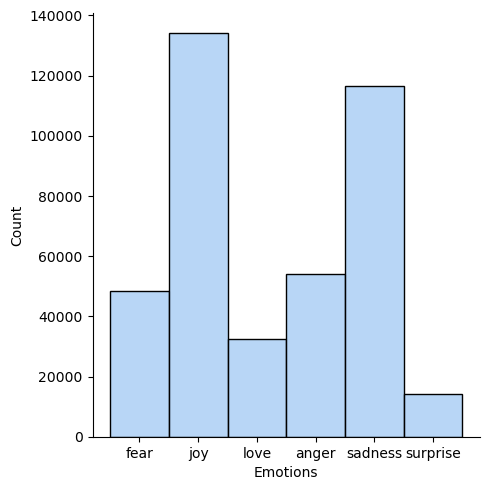

In [4]:
sns.set_palette("pastel")
sns.displot(emotion_emoji_merged, x="Emotions")

## Word cloud

In [17]:
def words_cloud(wordcloud, df):
    plt.figure(figsize=(10, 10))
    plt.title(df+' Word Cloud', size = 16)
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off")

In [26]:
stopwords= set(STOPWORDS)
new_stopwords=stopwords.union('feel')

In [12]:
emotions_list = emotion_emoji_merged['Emotions'].unique()
emotions_list

array(['fear', 'joy', 'love', 'anger', 'sadness', 'surprise'],
      dtype=object)

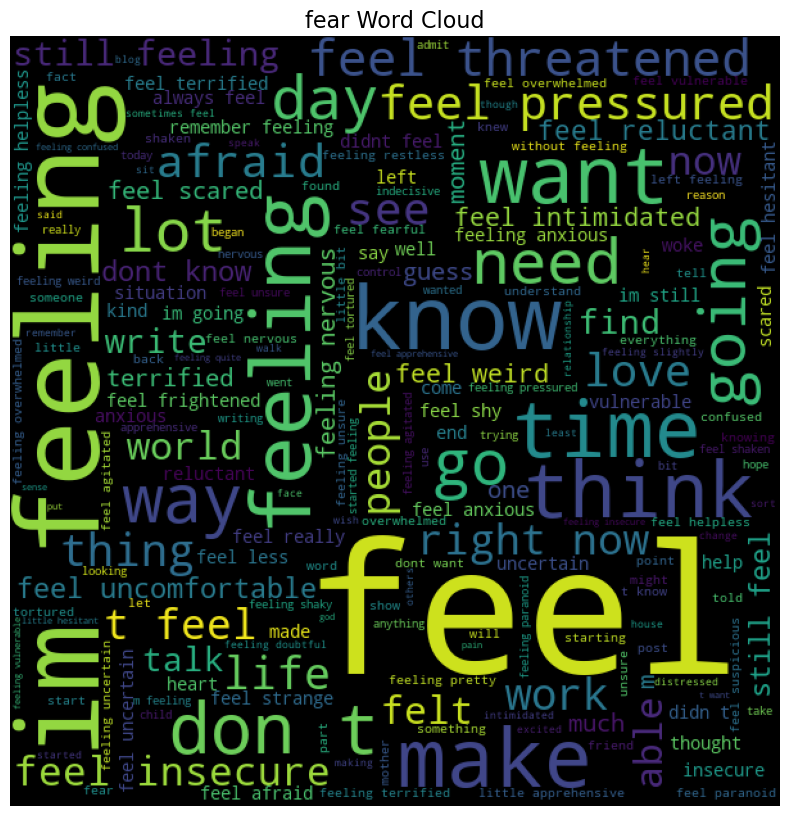

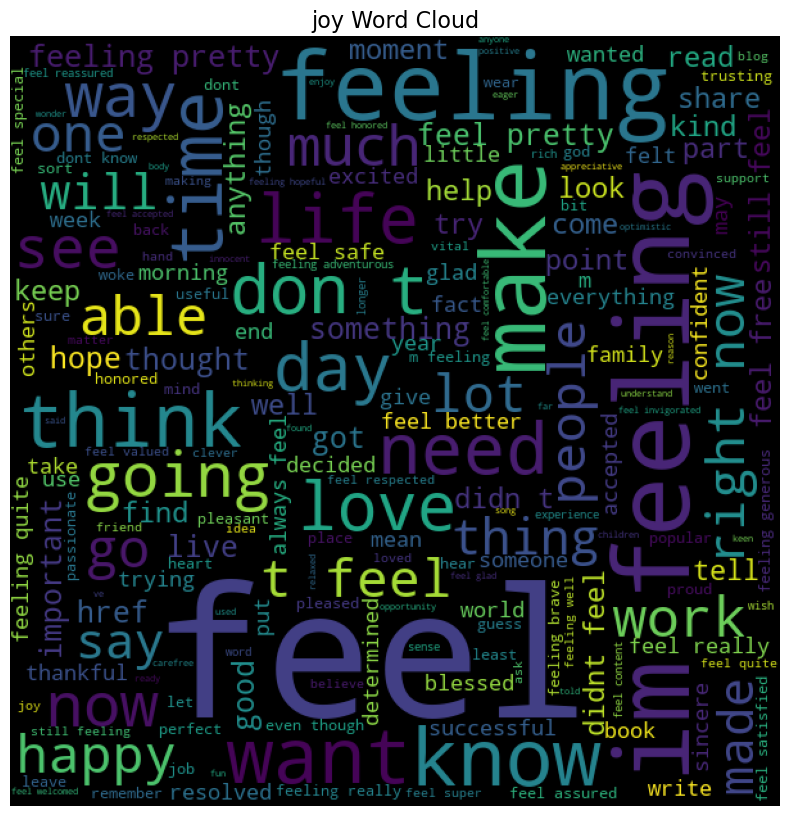

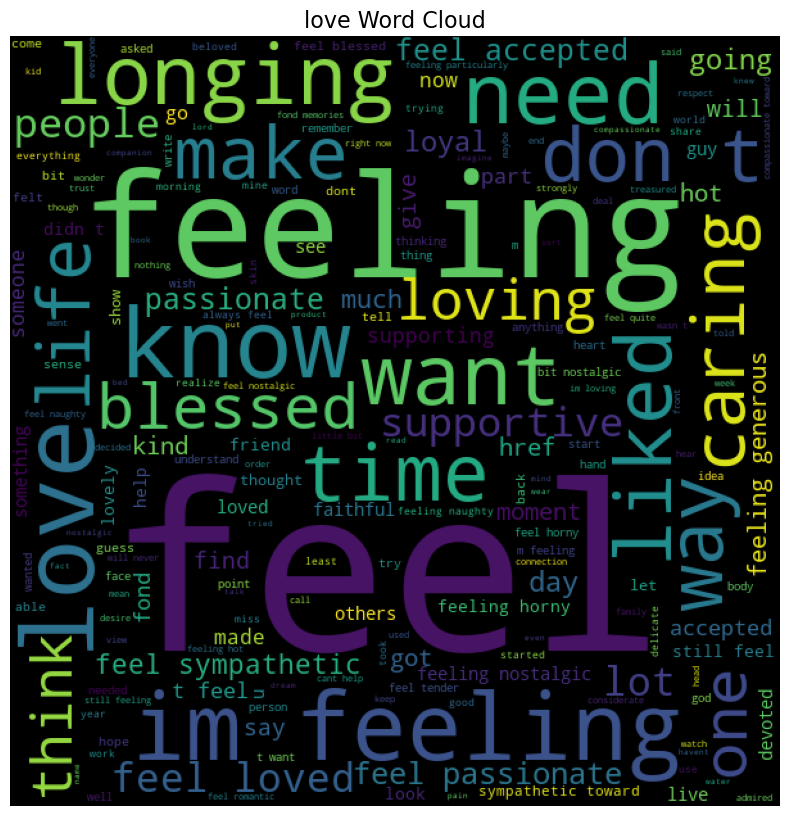

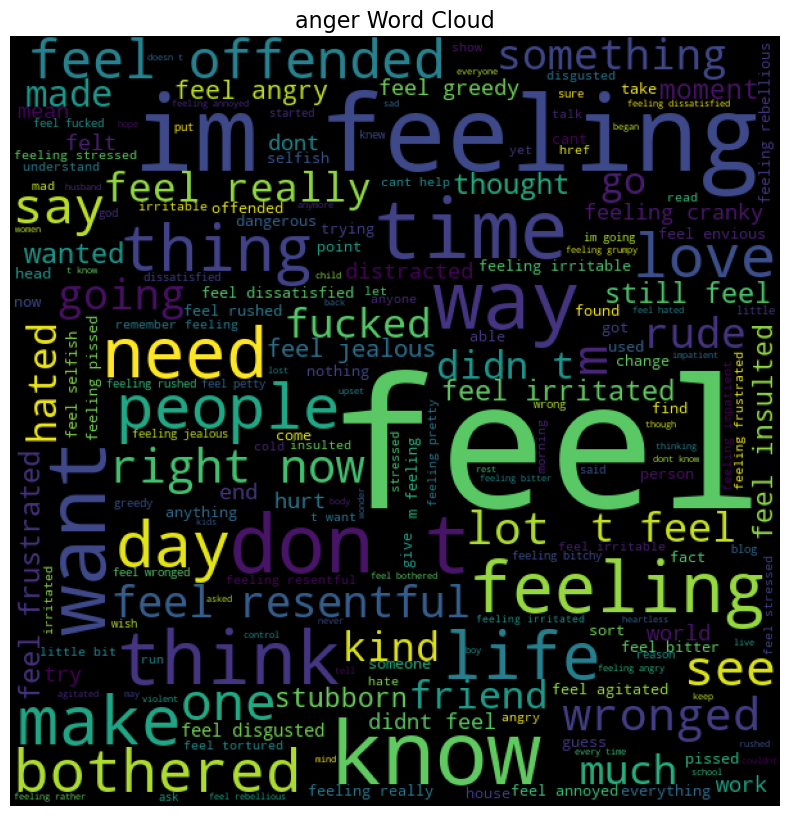

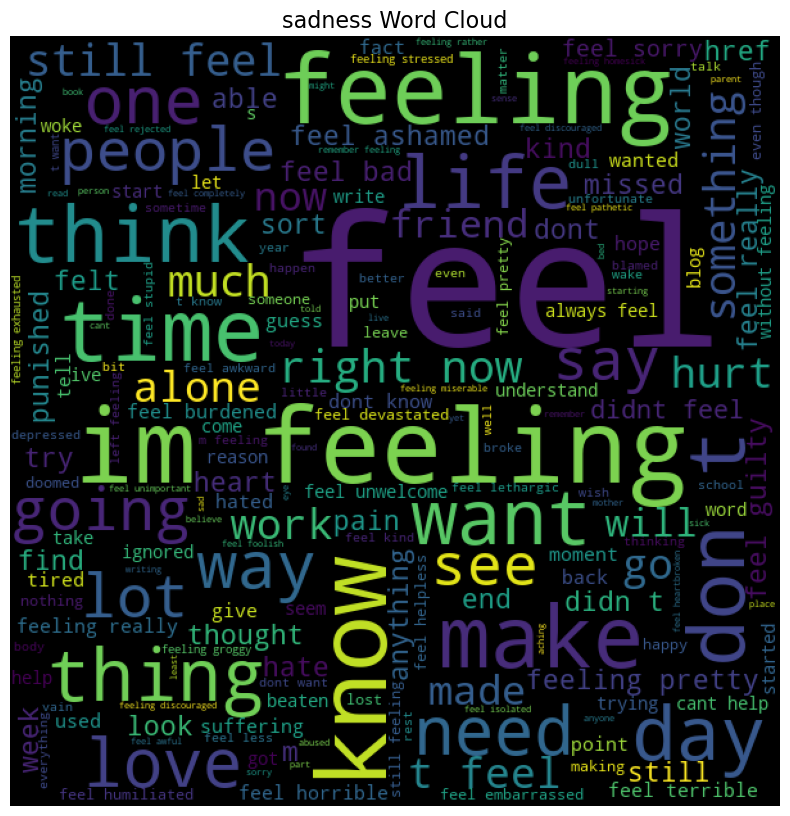

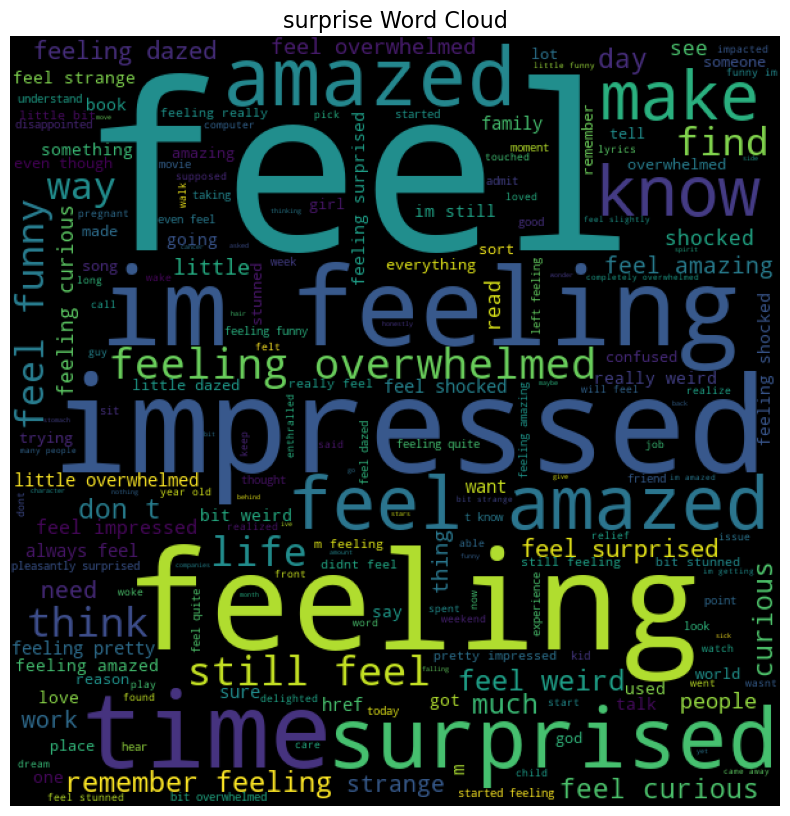

In [27]:
for emotion in emotions_list:
    text = ' '.join([sentence for sentence in emotion_emoji_merged.loc[emotion_emoji_merged['Emotions'] == emotion,'Sentence']])
    wordcloud = WordCloud(width = 600, height = 600, stopwords=stopwords).generate(text)
    words_cloud(wordcloud, emotion)

In [5]:
# create an embedding matrix using golve vectors from pre-trained models
file = open("../../../Desktop/glove.6B/glove.6B.50d.txt", encoding = 'utf8')


In [6]:
# function that creates a dictionary where the key is the word and the values are all the embeddings
# the dictionary that will hold the mappings between words, and the embedding vectors of those words
def intialize_emb_matrix(file):
    embedding_matrix = {}
    for line in file:
        values = line.split()
        word = values[0]
        embedding = np.array(values[1:], dtype='float64')
        embedding_matrix[word] = embedding

    return embedding_matrix 
embedding_matrix = intialize_emb_matrix(file)

In [7]:
from scipy.spatial import distance
def find_closest_embeddings(embedding):
    return sorted(embedding_matrix.keys(), key=lambda word: distance.euclidean(embedding_matrix[word], embedding))

In [8]:
print(find_closest_embeddings(embedding_matrix["paper"])[1:6])

['print', 'sheet', 'printed', 'printing', 'ink']
